In [1]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),  activation = 'relu', input_shape = (28, 28, 1))) # input으로 (28, 28, 1)을 setting 한 것 확인 -> MNIST 이미지 포멧
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3),  activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3),  activation = 'relu'))

Using TensorFlow backend.
W0710 21:00:28.085708   720 deprecation_wrapper.py:119] From C:\Users\koni1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0710 21:00:28.106653   720 deprecation_wrapper.py:119] From C:\Users\koni1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0710 21:00:28.111643   720 deprecation_wrapper.py:119] From C:\Users\koni1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0710 21:00:28.138566   720 deprecation_wrapper.py:119] From C:\Users\koni1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [6]:
# 컨브넷 구조를 출력해보자
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [8]:
# model.summary() 결과 확인
# 높이와 너비 차원은 네트워크가 깊어질수록(출력층에 가까워 질수록) 작아지는 경향이 있음
# (26, 26, 32) -> (11, 11, 64) -> (3, 3, 64)
# 채널의 수는 처음 conv2D를 만들었을때 전달된 '첫번째 매개변수'에 의해 결정

In [2]:
# 마지막 층(3, 3, 64)의 텐서를 완전 연결 네트워크에 주입함!
# 완전 연결 네트워크는 Dense층을 쌓은 분류기. -> 1D 벡터를 처리함
#                                             -> 이전 층(3, 3, 64)의 출력이 3D 이므로, 3D를 1D로 펼쳐야 함
# -> layers.Flatten 함수 이용
model.add(layers.Flatten())

# 10개의 클래스를 분류하기 위해 마지막 층의 크기를 10으로 함, softmax 활성화 함수 추가
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))



In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [4]:
# MNIST 이미지에 컨브넷 훈련하기
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [7]:
train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

In [8]:
model.compile(
    optimizer = 'rmsprop',
    loss      = 'categorical_crossentropy',
    metrics   = ['accuracy']
)
model.fit(train_images, train_labels, epochs = 5, batch_size = 64)

W0710 21:12:55.848049   720 deprecation_wrapper.py:119] From C:\Users\koni1\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0710 21:12:55.873982   720 deprecation_wrapper.py:119] From C:\Users\koni1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0710 21:12:56.051540   720 deprecation.py:323] From C:\Users\koni1\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0710 21:12:56.216064   720 deprecation_wrapper.py:119] From C:\Users\koni1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v

Epoch 1/5
60000/60000 [==============================] - 38s 625us/step - loss: 0.1724 - acc: 0.9456
Epoch 2/5
60000/60000 [==============================] - 39s 653us/step - loss: 0.0461 - acc: 0.9861
Epoch 3/5
60000/60000 [==============================] - 37s 621us/step - loss: 0.0316 - acc: 0.9906
Epoch 4/5
60000/60000 [==============================] - 37s 621us/step - loss: 0.0241 - acc: 0.9926
Epoch 5/5
60000/60000 [==============================] - 38s 634us/step - loss: 0.0191 - acc: 0.9940


In [1]:
# 예제 2
# 최대 풀링 연산을 제외한, 합성 곱으로만 이루어진 Convnet 만들기

In [2]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),  activation = 'relu', input_shape = (28, 28, 1))) # input으로 (28, 28, 1)을 setting 한 것 확인 -> MNIST 이미지 포멧
model.add(layers.Conv2D(64, (3, 3),  activation = 'relu'))
model.add(layers.Conv2D(64, (3, 3),  activation = 'relu'))

Using TensorFlow backend.
W0711 21:05:08.754165  7348 deprecation_wrapper.py:119] From C:\Users\koni1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0711 21:05:08.815000  7348 deprecation_wrapper.py:119] From C:\Users\koni1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0711 21:05:08.843928  7348 deprecation_wrapper.py:119] From C:\Users\koni1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [2]:
# 소규모 데이터셋에서 밑바닥부터 컨브넷 훈련하기.
import os, shutil

# 현재 경로 확인.
os.getcwd()
# original_dataset_dir

'C:\\Users\\koni1\\케라스창시자에게배우는딥러닝'

In [4]:
# 훈련, 검증, 테스트 폴더로 이미지 복사
original_dataset_dir = './cats_and_dogs/train'

# 소규모 데이터셋을 저장할 디렉토리
base_dir = './cats_and_dogs_small'
# os.mkdir(base_dir)

In [5]:
# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

In [6]:
# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)

# 테스트용 강아진 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)

In [10]:
# 고양이
# 처음 1000개의 고양이 이미지를 train_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst) # shutil.copyfile -> 이미지를 복사하는 function

In [17]:
# 500개 고양이 이미지 사진을 valiation_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst) # shutil.copyfile -> 이미지를 복사하는 function

In [20]:
# 500개 고양이 이미지 사진을 test_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst) # shutil.copyfile -> 이미지를 복사하는 function

In [21]:
# 강아지 
# 처음 1000개의 강아지 이미지를 train_cats_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst) # shutil.copyfile -> 이미지를 복사하는 function

In [23]:
# 500개의 강아지 이미지를 validation_cats_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst) # shutil.copyfile -> 이미지를 복사하는 function

In [24]:
# 500개의 강아지 이미지를 test_cats_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst) # shutil.copyfile -> 이미지를 복사하는 function

In [7]:
# 복사가 잘 되었는지 확인하기 위해 각 분할에 들어 있는 사진 개수 카운트
print("훈련용 고양이 이미지 전체 개수 :", len(os.listdir(train_cats_dir)))
print("훈련용 강아지 이미지 전체 개수 :", len(os.listdir(train_dogs_dir)))

print("검증용 고양이 이미지 전체 개수 :", len(os.listdir(validation_cats_dir)))
print("검증용 강아지 이미지 전체 개수 :", len(os.listdir(validation_dogs_dir)))

print("테스트용 고양이 이미지 전체 개수 :", len(os.listdir(test_cats_dir)))
print("테스트용 강아지 이미지 전체 개수 :", len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수 : 1000
훈련용 강아지 이미지 전체 개수 : 1000
검증용 고양이 이미지 전체 개수 : 500
검증용 강아지 이미지 전체 개수 : 500
테스트용 고양이 이미지 전체 개수 : 500
테스트용 강아지 이미지 전체 개수 : 500


In [8]:
# 강아지 vs 고양이 분류를 위한 소규모 컨브넷 만들기
# 어떤 ConvNet ?
from keras import layers
from keras import models

model = models.Sequential()

# 첫 번째 합성곱층 -> 3X3 윈도우를 커널로 사용하여, 32개의 특성 추출
# 첫 번째 맥스풀링 -> stride 2, window 2X2로 특성 추출
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))                                                                                                  
model.add(layers.MaxPooling2D(2, 2))

# 두 번째 합성곱층 -> 3X3 윈도우를 커널로 사용하여, 64개의 특성 추출
# 두 번째 맥스풀링 -> stride 2, window 2X2로 특성 추출
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))  
model.add(layers.MaxPooling2D(2, 2))

# 세 번째 합성곱층 -> 3X3 윈도우를 커널로 사용하여, 128개의 특성 추출
# 세 번째 맥스풀링 -> stride 2, window 2X2로 특성 추출
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))  
model.add(layers.MaxPooling2D(2, 2))

# 네 번째 합성곱층 -> 3X3 윈도우를 커널로 사용하여, 128개의 특성 추출
# 네 번째 맥스풀링 -> stride 2, window 2X2로 특성 추출
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))  
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

Using TensorFlow backend.
W0713 22:14:45.403299 11660 deprecation_wrapper.py:119] From C:\Users\koni1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 22:14:45.457154 11660 deprecation_wrapper.py:119] From C:\Users\koni1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 22:14:45.468125 11660 deprecation_wrapper.py:119] From C:\Users\koni1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0713 22:14:45.505059 11660 deprecation_wrapper.py:119] From C:\Users\koni1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [10]:
# optimizer, loss function 선택
# RMSprop 옵티마이저 선택
# 이진 크로스엔트로피 사용

from keras import optimizers

model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr=1e-4),
              metrics = ['acc']
             )

W0713 22:14:56.026895 11660 deprecation_wrapper.py:119] From C:\Users\koni1\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0713 22:14:56.034951 11660 deprecation_wrapper.py:119] From C:\Users\koni1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0713 22:14:56.045844 11660 deprecation.py:323] From C:\Users\koni1\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [34]:
# 데이터 전처리
# 우리는 keras의 ImageDataGenerator 사용
# -> 디스크에 있는 이미지 파일을 전처리된 배치 텐서로 자동으로 바꾸어 주는 파이썬 제너레이터를 만들어 줌

In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale= 1./ 255) # 모든 이미지를 1/255로 스케일 조정
test_datagen  = ImageDataGenerator(rescale= 1./ 255)

# ImageDataGenerator를 사용하여 디렉터리에서 이미지 읽기
train_generator = train_datagen.flow_from_directory(
    train_dir,                  # 타겟 디렉토리
    target_size = (150, 150),   # 모든 이미지를 150 X 150 크기로 바꿈
    batch_size  = 20,            
    class_mode = 'binary'       # binary_crossentropy 손실을 사용하기 때문에 
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,                  # 타겟 디렉토리
    target_size = (150, 150),   # 모든 이미지를 150 X 150 크기로 바꿈
    batch_size  = 20,            
    class_mode = 'binary'       # binary_crossentropy 손실을 사용하기 때문에 
)

# 출력은 150 X 150 RGB 이미지의 배치 (20, 150, 150, 3))
# 각 배치의 크기는 20
# 제너레이터는 배치를 무한정 만들어냄. -> target folder에 있는 이미지를 끝없이 반복함.
# -> 따라서 반복 루프 안 어디에선가 break 문을 사용해야 함

for data_batch, labels_batch in train_generator:
    print("배치 데이터 크기:", data_batch.shape)
    print("배치 레이블 크기:", labels_batch.shape)
    break
    

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [12]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps =50
)

W0713 22:16:29.134013 11660 deprecation_wrapper.py:119] From C:\Users\koni1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/30
100/100 [==============================] - 70s 703ms/step - loss: 0.6857 - acc: 0.5385 - val_loss: 0.6599 - val_acc: 0.6290
Epoch 2/30
100/100 [==============================] - 69s 693ms/step - loss: 0.6399 - acc: 0.6520 - val_loss: 0.6248 - val_acc: 0.6600
Epoch 3/30
100/100 [==============================] - 69s 688ms/step - loss: 0.5846 - acc: 0.6895 - val_loss: 0.7243 - val_acc: 0.6040
Epoch 4/30
100/100 [==============================] - 68s 680ms/step - loss: 0.5547 - acc: 0.7145 - val_loss: 0.5832 - val_acc: 0.6980
Epoch 5/30
100/100 [==============================] - 71s 714ms/step - loss: 0.5276 - acc: 0.7425 - val_loss: 0.5825 - val_acc: 0.6860
Epoch 6/30
100/100 [==============================] - 88s 881ms/step - loss: 0.5057 - acc: 0.7545 - val_loss: 0.5640 - val_acc: 0.6940
Epoch 7/30
100/100 [==============================] - 67s 668ms/step - loss: 0.4882 - acc: 0.7725 - val_loss: 0.5903 - val_acc: 0.6820
Epoch 8/30
100/100 [==============================] - 7

In [13]:
model.save('cats_and_dogs_small_1.h5')

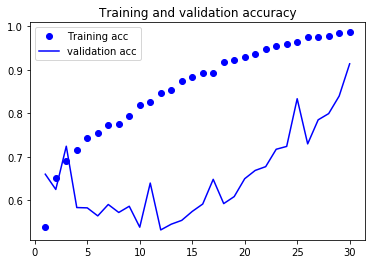

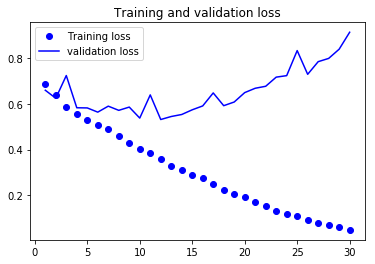

In [15]:
# 훈련의 정확도와 손실 그래프 그리기
import matplotlib.pyplot as plt

acc      = history.history['acc']      # 정확도
val_acc  = history.history['val_acc']
loss     = history.history['loss']      # 손실
val_loss = history.history['val_loss']

epochs  = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
# ImageDataGenerator를 사용하여 데이터 증식 설정하기.
datagen = ImageDataGenerator(

    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range  = 0.1,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

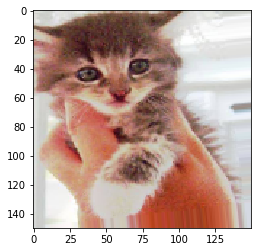

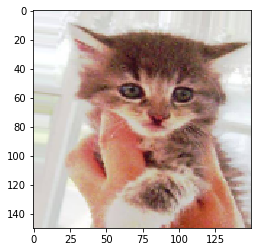

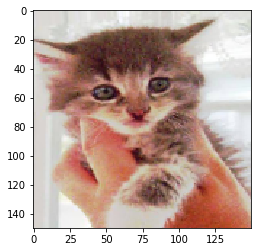

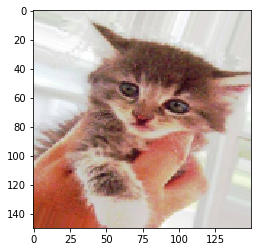

In [20]:
# 랜덤하게 증식된 훈련 이미지 그리기.
from keras.preprocessing import image # 이미지 전처리 유틸리티 모듈

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3] # 증식할 이미지 선택

img = image.load_img(img_path, target_size = (150, 150)) # 이미지를 읽고 크기를 150, 150 으로 변경

x = image.img_to_array(img)   # 150, 150, 3 크기의 넘파이 배열로 변환
x = x.reshape((1,) + x.shape) # (1, 150, 150, 3) 크기로 변환합니다.

# 앞에서 만든 ImageDataGenerator를 이용해서 랜덤하게 변환된 이미지 배치 생성
i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [21]:
# Dropout을 포함한 새로운 컨브넷 정의
# 상단의 모델 생성에서 해당 소스 추가

# 강아지 vs 고양이 분류를 위한 소규모 컨브넷 만들기
# 어떤 ConvNet ?
from keras import layers
from keras import models

model = models.Sequential()

# 첫 번째 합성곱층 -> 3X3 윈도우를 커널로 사용하여, 32개의 특성 추출
# 첫 번째 맥스풀링 -> stride 2, window 2X2로 특성 추출
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))                                                                                                  
model.add(layers.MaxPooling2D(2, 2))

# 두 번째 합성곱층 -> 3X3 윈도우를 커널로 사용하여, 64개의 특성 추출
# 두 번째 맥스풀링 -> stride 2, window 2X2로 특성 추출
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))  
model.add(layers.MaxPooling2D(2, 2))

# 세 번째 합성곱층 -> 3X3 윈도우를 커널로 사용하여, 128개의 특성 추출
# 세 번째 맥스풀링 -> stride 2, window 2X2로 특성 추출
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))  
model.add(layers.MaxPooling2D(2, 2))

# 네 번째 합성곱층 -> 3X3 윈도우를 커널로 사용하여, 128개의 특성 추출
# 네 번째 맥스풀링 -> stride 2, window 2X2로 특성 추출
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))  
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())

# Drop out 추가
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))




W0713 23:44:19.337901 11660 deprecation.py:506] From C:\Users\koni1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [22]:
model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr=1e-4),
              metrics = ['acc']
             )

In [23]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale= 1./ 255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range  = 0.2,
    horizontal_flip = True,
) # 모든 이미지를 1/255로 스케일 조정

test_datagen  = ImageDataGenerator(rescale= 1./ 255) # 검증 데이터는 증식해서는 안됩니다.1!!

# ImageDataGenerator를 사용하여 디렉터리에서 이미지 읽기
train_generator = train_datagen.flow_from_directory(
    train_dir,                  # 타겟 디렉토리
    target_size = (150, 150),   # 모든 이미지를 150 X 150 크기로 바꿈
    batch_size  = 32,            
    class_mode = 'binary'       # binary_crossentropy 손실을 사용하기 때문에 
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,                  # 타겟 디렉토리
    target_size = (150, 150),   # 모든 이미지를 150 X 150 크기로 바꿈
    batch_size  = 32,            
    class_mode = 'binary'       # binary_crossentropy 손실을 사용하기 때문에 
)

# 출력은 150 X 150 RGB 이미지의 배치 (20, 150, 150, 3))
# 각 배치의 크기는 20
# 제너레이터는 배치를 무한정 만들어냄. -> target folder에 있는 이미지를 끝없이 반복함.
# -> 따라서 반복 루프 안 어디에선가 break 문을 사용해야 함

for data_batch, labels_batch in train_generator:
    print("배치 데이터 크기:", data_batch.shape)
    print("배치 레이블 크기:", labels_batch.shape)
    break


history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps =50
)

model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
배치 데이터 크기: (32, 150, 150, 3)
배치 레이블 크기: (32,)
Epoch 1/100
 81/100 [=======================>......] - ETA: 18s - loss: 0.6945 - acc: 0.4946

KeyboardInterrupt: 

In [9]:
# pretained Model 실습
# VGG16 합성곱 기반 층 만들기

from keras.applications import VGG16

conv_base = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (150, 150, 3)
                 )


In [10]:
# 사전 훈련된 합성곱 기반 층을 사용한 특성 추출
# 먼저 ImageDataGenerator를 사용하여 이미지와 레이블을 넘파이 배열로 추출
# conv_base 모델의 predict 메서드를 호출하여 이 이미지에서 특성 추출.

import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

os.getcwd()

base_dir = './cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [11]:
datagen    = ImageDataGenerator(rescale = 1./ 255)
batch_size = 20

In [15]:
# feature Map 을 numpy 배열로 변환 후, conV_base 모델을 통해 predict 값을 출력.
def extract_features(directory, sample_count):
    features = np.zeros(shape = (sample_count, 4, 4, 512)) # 합성곱 층 제일 마지막 출력 feature shape 배열 선언
    labels   = np.zeros(shape = (sample_count))            # 합성곱 층 제일 마지막 출력 label shape 배열 선언
    generator = datagen.flow_from_directory(
        directory,                         # directory
        target_size = (150, 150),          # 합성곱 층(conv_base 입력 값). 모든 이미지를 150, 150으로 바꿈
        batch_size  = batch_size,          # batch_size = 20
        class_mode  = 'binary'             # 이진 분류
    )
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size]   = labels_batch
        
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
# 추출된 특성의 크기는 (samples, 4, 4, 512)
# -> 완전 연결 분류기에 주입하기 위해서는 먼저 (samples, 8192) 크기로 펼침.

train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [24]:
# 완전 연결 분류기를 정의하고 훈련하기
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation = 'relu', input_dim = 4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [25]:
model.compile(optimizer = optimizers.RMSprop(lr=2e-5),
              loss = 'binary_crossentropy',
              metrics = ['acc']
             )

history = model.fit(train_features, train_labels,
                    epochs = 30,
                    batch_size = 20,
                    validation_data = (validation_features, validation_labels)
                )

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.5940 - acc: 0.6690 - val_loss: 0.4262 - val_acc: 0.8320
Epoch 2/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.4194 - acc: 0.8130 - val_loss: 0.3522 - val_acc: 0.8630
Epoch 3/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3498 - acc: 0.8460 - val_loss: 0.3162 - val_acc: 0.8730
Epoch 4/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3076 - acc: 0.8670 - val_loss: 0.2977 - val_acc: 0.8800
Epoch 5/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2772 - acc: 0.8910 - val_loss: 0.3048 - val_acc: 0.8650
Epoch 6/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2555 - acc: 0.8995 - val_loss: 0.2690 - val_acc: 0.8930
Epoch 7/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2414 - acc: 0.9005 - val_loss: 0.2621 - val_acc: 0.8930
Epoch 8/30
200

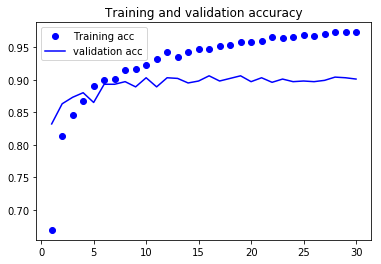

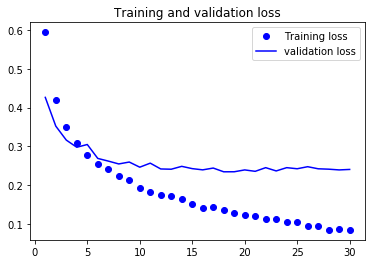

In [28]:
# 훈련의 정확도와 손실 그래프 그리기
import matplotlib.pyplot as plt

acc     = history.history['acc']      # 정확도
val_acc = history.history['val_acc']
loss    = history.history['loss']      # 손실
val_loss = history.history['val_loss']

epochs  = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [29]:
# 데이터 증식을 사용한 특성 추출
# 이 방법은 GPU를 사용할 수 있을 때 적용해야 함. CPU로는 불가능

# 완전 연결 분류기를 정의하고 훈련하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base) # conv_base 추가!
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [32]:
# 합성곱 층을 동결해야 함(freezing)
print('conv_base를 동결하기 전 훈련되는 가중치의 수:', len(model.trainable_weights))

conv_base.trainable = False

print("conv_base 동결 후 훈련되는 가중치의 수 : ", len(model.trainable_weights))


conv_base를 동결하기 전 훈련되는 가중치의 수: 30
conv_base 동결 후 훈련되는 가중치의 수 :  4


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

# GPU 없으면 못돌리므로, (너무 오래걸리므로,) pass
train_datagen = ImageDataGenerator(
    rescale= 1./ 255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range  = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
) # 모든 이미지를 1/255로 스케일 조정

test_datagen  = ImageDataGenerator(rescale= 1./ 255)

# ImageDataGenerator를 사용하여 디렉터리에서 이미지 읽기
train_generator = train_datagen.flow_from_directory(
    train_dir,                  # 타겟 디렉토리
    target_size = (150, 150),   # 모든 이미지를 150 X 150 크기로 바꿈
    batch_size  = 20,            
    class_mode = 'binary'       # binary_crossentropy 손실을 사용하기 때문에 
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,                  # 타겟 디렉토리
    target_size = (150, 150),   # 모든 이미지를 150 X 150 크기로 바꿈
    batch_size  = 20,            
    class_mode = 'binary'       # binary_crossentropy 손실을 사용하기 때문에 
)

model.compile(optimizer = optimizers.RMSprop(lr=2e-5),
              loss = 'binary_crossentropy',
              metrics = ['acc']
             )

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50,
    verbose = 2
)

In [ ]:
# 미세 조정(fine-tuning)
# 특정 층까지 모든 층 동결하기

conv_base.trainable = True
set_trainable       = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False





In [1]:
# 중간층의 활성화 시각화하기
# 기존의 사용했던 모델 구초 호출(local에서는 돌리기 힘든 구조이기 때문에, 생성 안했었음)

from keras.models import load_model
model = load_model('cats_and_dogs_small_1.h5')
model.summary()

# 훈련할 때  사용하지 않았던 이미지 한개를 호출. 
img_path = './cats_and_dogs_small/test/cats/cat.1700.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size = (150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0) # 이미지를 4D tensor로 변환
img_tensor /= 255.

print(img_tensor.shape)

Using TensorFlow backend.
W0715 21:14:07.664072  4944 deprecation_wrapper.py:119] From C:\Users\koni1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0715 21:14:07.737977  4944 deprecation_wrapper.py:119] From C:\Users\koni1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0715 21:14:07.795514  4944 deprecation_wrapper.py:119] From C:\Users\koni1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0715 21:14:08.206194  4944 deprecation_wrapper.py:119] From C:\Users\koni1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0715 21:14:08.208179  4944 deprecation_wrapper.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

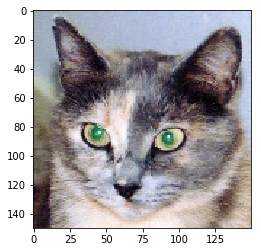

In [3]:
# 테스트 사진 출력하기
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [7]:
# 입력 텐서와 출력 텐서의 리스트로 모델 객체 만들기
from keras import models
layer_outputs    = [layer.output for layer in model.layers[:8]] # 상위 8개의 층의 출력을 추출
activation_model = models.Model(inputs = model.input, outputs = layer_outputs) # 입력에 대해 8개 층의 출력을 반환하는 모델을 만듬

activations = activation_model.predict(img_tensor) # 층의 활성화마다 하나씩 8개의 넘파이 배열로 이루어진 리스트 반환

In [9]:
# 보려고 했던 고양이 이미지에 대한 첫 번째 합성곱 층의 활성화 값. -> (148, 148, 32)
first_layer_activation = activations[0] # 0번째(첫번째 필터) 합성곱 추출
print(first_layer_activation.shape)      

(1, 148, 148, 32)


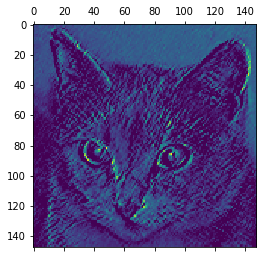

In [11]:
# 원본 모델의 첫번째 활성화 중에서 20번째 채널을 그려보쟈
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 19], cmap = 'viridis') # cmap -> colorMap. 이에 따라 색깔이 달라짐

C:\Users\koni1\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


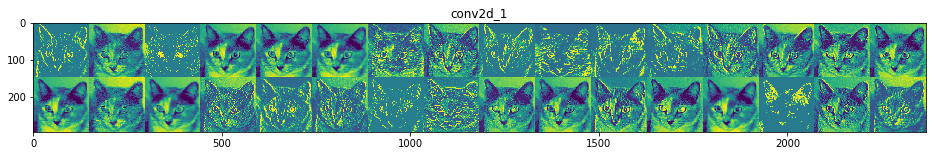

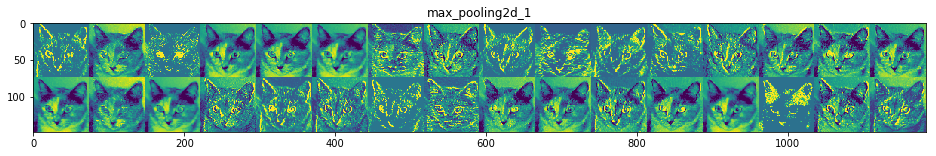

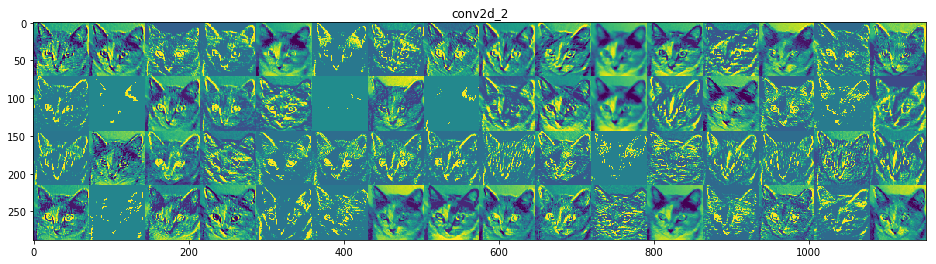

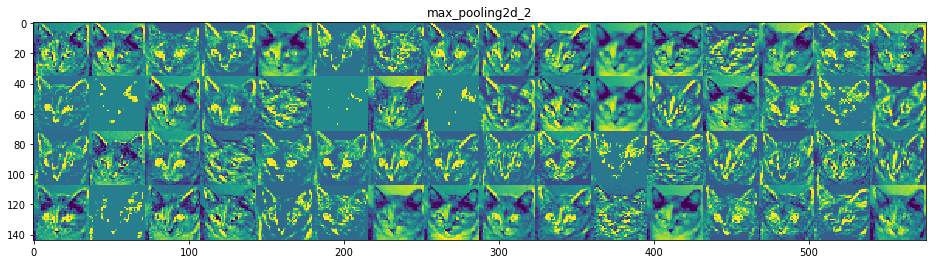

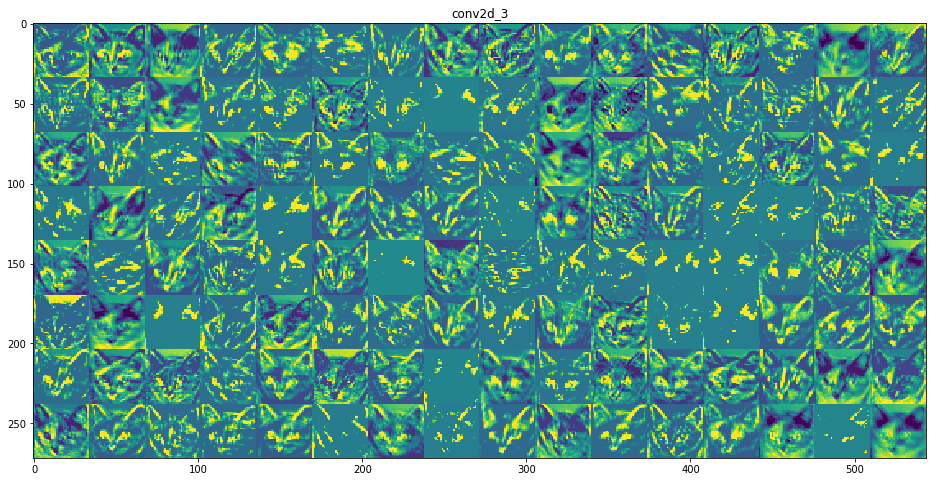

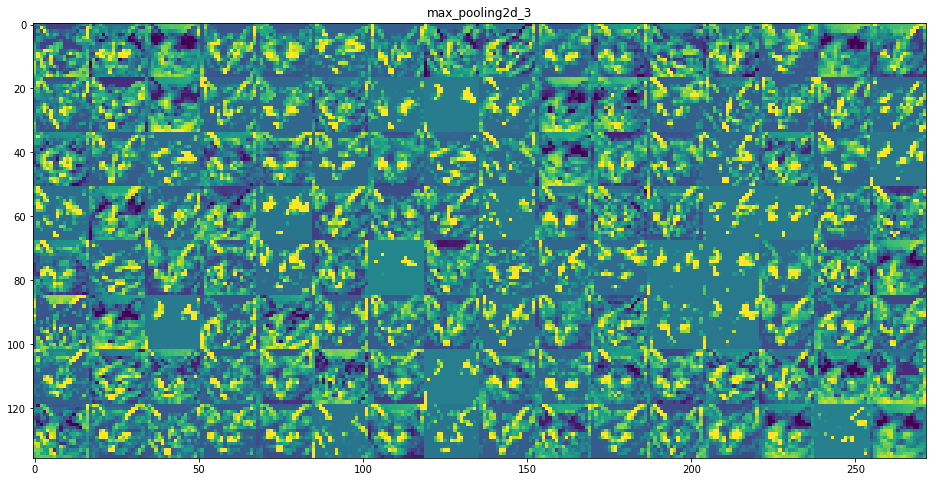

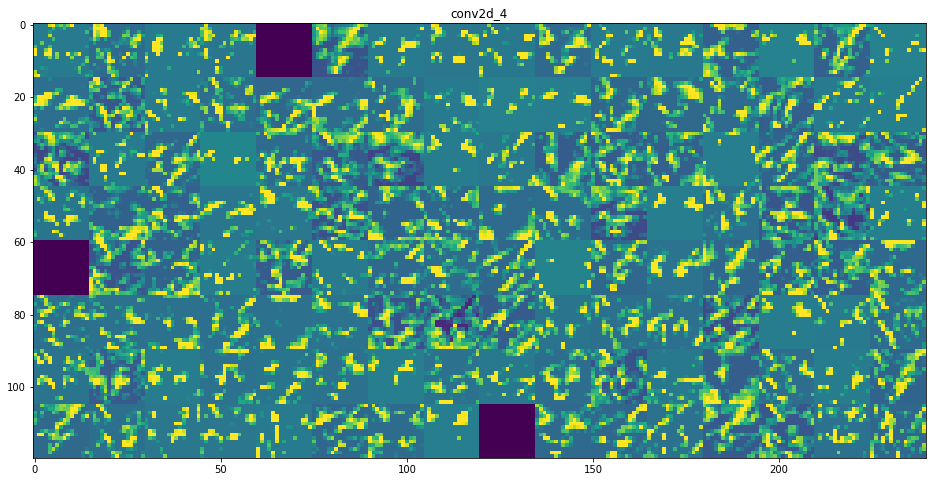

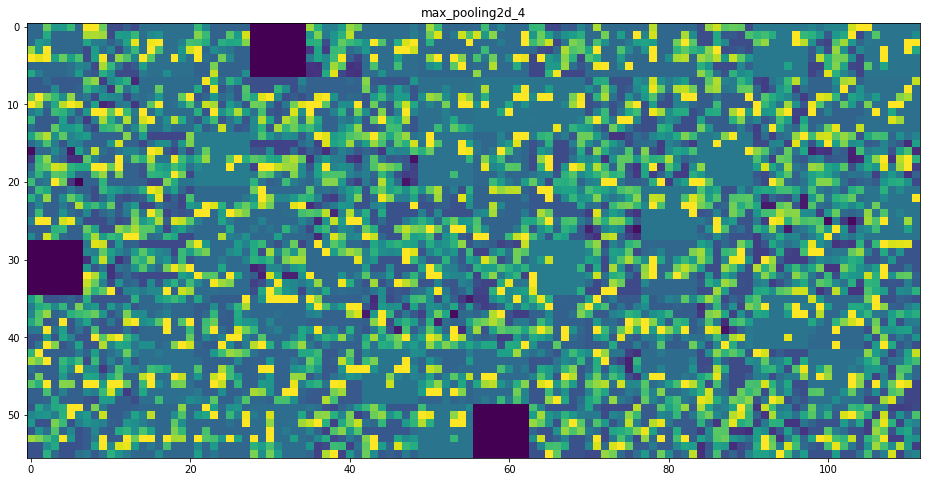

In [19]:
# 네트워크의 모든 활성화를 시각화해 보자.
# 8개의 활성화 맵에서 추출한 모든 채널을 그리기 위해 하나의 큰 이미지 텐서에 추출한 결과를 나란히 쌓아보자!

# 층의 이름을 그래프 제목으로 사용하기 위함
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # 특성 맵을 그림
    n_features = layer_activation.shape[-1]                        # 특성 맵에 있는 특성의 수 
    
    size = layer_activation.shape[1]                              # 특성 맵의 크기(1, size, size, n_features)
    
    n_cols = n_features // images_per_row                         # 활성화 채널을 위한 그리드 크기를 구함
    display_grid = np.zeros((size * n_cols, images_per_row * size)) # 전체 display_grid 크기. 우리가 보기에는 grid이지만, 하나의 이미지 처럼 표현할 것임.  
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            
            # 그래프로 나타내기 좋게 특성 처리
            # 임의의 실수인 층의 출력을 픽셀로 표현이 가능한 0 ~ 255 사이의 정수로 바꾸어 줌. 
            # 1. 먼저 평균을 뺀다
            # 2. 표준편차로 나누어 줌 -> 표준 점수로 바꿈
            # 3. 표준 점수 2.0 이내의 값들이 0 ~ 255 사이에 놓이도록 증폭( 64를 곱해주고, 128을 더해줌)
            # 4 클리핑
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size
                        ] = channel_image
            
    scale = 1. / size # 특성 맵의 크기로 나누어 줌.
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0])) # 특성 맵의 크기로 전체 이미지의 figsize 조정 
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')


In [1]:
# 2. 필터 시각화를 위한 손실 텐서 정의하기
#Imagenet의 사전 훈련된 VGG16 네트워크에서 block3_conv1 층 필터 0번의 활성화를 손실로 정의 
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights = 'imagenet',
              include_top = False
             )

layer_name   = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

Using TensorFlow backend.
W0716 20:52:39.404469  8996 deprecation_wrapper.py:119] From C:\Users\koni1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0716 20:52:39.447355  8996 deprecation_wrapper.py:119] From C:\Users\koni1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 20:52:39.462314  8996 deprecation_wrapper.py:119] From C:\Users\koni1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0716 20:52:39.516171  8996 deprecation_wrapper.py:119] From C:\Users\koni1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0716 20:52:40.009848  8996 deprecation_wrapper.py:11

In [3]:
# 경사 상승법을 구하기 위해서는 모델의 입력에 대한 손실의 그래디언트가 필요
# keras backend 모듈의 gradient 함수를 사용

grads = K.gradients(loss, model.input)[0] # gradients 함수가 반환하는 텐서 리스트에서 첫 번째 텐서를 추출


In [5]:
# 그래디언트 정규화
grads /= K.sqrt(K.mean(K.square(grads)) + 1e-5) # 나눗셈을 방지하기 위해 1e-5 를 더함 

In [6]:
# 입력 이미지에 대해 손실 텐서와 그래디언트 텐서를 계산해야함. 
# 케라스 백엔드 함수를 사용하여 처리
# iterate는 넘파이 텐서를 입력으로 받아 손실과 그래디언트 2개의 넘파이 텐서를 반환.
iterate = K.function([model.input], [loss, grads])

import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))]) #  loss 값과 grads 값을 return 할 수 있는 0으로 된 껍데기를 만듬.

In [10]:
# 파이썬 루프를 만들어 확률적 경사 상승법을 만듬
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128 # 잡음이 섞인 회색 이미지로 시작

step = 1 # 업그레이드할 그래디언트의 크기
for i in range(40): # 경사 상승법을 40회 수행 !
    loss_value, grads_value = iterate([input_img_data]) 
    input_img_data += grads_value * step # 손실을 최대화하는 방향으로 입력 이미지를 수정

In [15]:
# 결과 이미지 텐서는 (1, 150, 150, 3) 크기의 부동 소수 텐서임
# 이 텐서 값은 [0, 255] 사이의 정수가 아님
# 따라서 출력 가능한 이미지로 변경하기 위해 후처리할 필요가 있음.

def deprocess_image(x):
    # 텐서의 평균이 0, 표준편차가 0.1이 되도록 정규화
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    # [0,1] 로 클리핑함
    x += 0.5  
    x = np.clip(x, 0, 1)
    
    # RGB 배열로 전환
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x


In [16]:
# 다음 코드들 모아, 층의 이름과 필터 번호를 입력으로 받는 함수를 만들어보자
def generate_pattern(layer_name, filter_index, size =150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    
    grads = K.gradients(loss, model.input)[0] # gradients 함수가 반환하는 텐서 리스트에서 첫 번째 텐서를 추출
    grads /= K.sqrt(K.mean(K.square(grads)) + 1e-5) # 나눗셈을 방지하기 위해 1e-5 를 더함 . 그래디언트 정규화
    
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128 # 잡음이 섞인 회색 이미지로 시작
    
    step = 1
    for i in range(40): # 경사 상승법을 40회 수행 !
        loss_value, grads_value = iterate([input_img_data]) 
        input_img_data += grads_value * step # 손실을 최대화하는 방향으로 입력 이미지를 수정
    
    img = input_img_data[0]
    return deprocess_image(img)

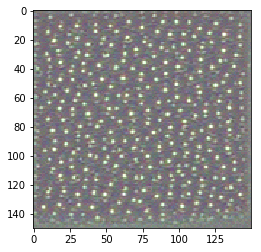

In [17]:
import matplotlib.pyplot as plt
plt.imshow(generate_pattern('block3_conv1', 0))
# -> 이 패턴은 물방울 패턴에 반응하는 듯 하다!

In [19]:
# 모든 층에 있는 필터를 시각화해보자.
# 책 233p 참고!

In [20]:
# CAM(Class Activation Map) 실습
# Grad-CAM.

In [21]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights = 'imagenet')

553467904/553467096 [==============================] - 455s 1us/step


In [22]:
# VGG16을 위해 입력 이미지 전처리
# 초원을 걷는 어미와 새끼 아프리카 코끼리의 이미지를 적용해보자.
# 1. VGG16을 위해 입력 이미지 전처리 하기
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

img_path = './datasets/creative_commons_elephant.jpg' # 이미지 경로 저장

img = image.load_img(img_path, target_size = (244 , 244))
x   = image.img_to_array(img) # (244, 244, 3) 크기의 넘파이 float32 배열로 전환 

x = np.expand_dims(x, axis = 0) # 차원을 추가하여 (1, 244, 244, 3) 크기의 배치로 배열을 변환

x = preprocess_input(x) # 데이터를 전처리(채널별 컬러 정규화를 수행)


FileNotFoundError: [Errno 2] No such file or directory: './datasets/creative_commons_elephant.jpg'

In [ ]:
# 이 이미지에서 사전 훈련된 네트워크를 실행하고,
# 예측 벡터를 이해하기 쉽게 디코딩.
preds = model.predict(x)
print('Predicted', decode_predictions(preds, top = 3)[0])

In [ ]:
# 결과를 확인해보면, 이 이미지에 대한 상위 3개의 예측 클래스는
# 1. 아프리카 코끼리(92.5%)
# 2. 코끼리(tusker)(7%)
# 3. 인도 코끼리(0.4%)

# 예측 벡터에서 최대로 활성화한 항목은 아프리카 코끼리 -> 386번 인덱스
np.argmax(preds[0])

In [ ]:
# 코드 5-42 Grad-CAM 알고리즘 설명하기

idx_ele = np.argmax(preds[0])

# 예측 벡터의 '아프리카 코끼리' 항목
african_elephant_output = model.output[:, idx_ele]

# VGG16의 마지막 합성곱 층인 block5_conv3 층의 특성 맵
last_conv_layer = model.get_layer('block5_conv3')

# block5_conv3의 특성 맵 출력에 대한 '아프리카 코끼리' 클래스의 그래디언트
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# 특성 맵 채널별 그래디언트 평균 값이 담긴 (512,) 크기의 벡터
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# 샘플 이미지가 주어졌을 때 방금 전 정의한 pooled_grads와 block5_conv3의 특성 맵 출력을 구합니다
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

# 두 마리 코끼리가 있는 샘플 이미지를 주입하고 두 개의 넘파이 배열을 얻습니다
pooled_grads_value, conv_layer_output_value = iterate([x])

# "아프리카 코끼리" 클래스에 대한 "채널의 중요도"를 특성 맵 배열의 채널에 곱합니다
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# 만들어진 특성 맵에서 채널 축을 따라 평균한 값이 클래스 활성화의 히트맵입니다
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [ ]:
# 코드 5-43 히트맵 후처리하기
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [ ]:
# 코드 5-44 원본 이미지에 히트맵 덧붙이기

import cv2

# cv2 모듈을 사용해 원본 이미지를 로드합니다
img = cv2.imread(img_path)

# heatmap을 원본 이미지 크기에 맞게 변경합니다
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

# heatmap을 RGB 포맷으로 변환합니다
heatmap = np.uint8(255 * heatmap)

# 히트맵으로 변환합니다
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# 0.4는 히트맵의 강도입니다
superimposed_img = heatmap * 0.4 + img

# 디스크에 이미지를 저장합니다
cv2.imwrite('./datasets/elephant_cam.jpg', superimposed_img)

In [ ]:
# 코랩 출력
from IPython.display import Image
Image('./datasets/elephant_cam.jpg')